**Harvey-Collier Test: Brief Description**

The Harvey-Collier Test is a statistical test used to check if residuals in a model are linear. To back it up, linear regression can only be run on data that has a linear relationship. So, the dependent variable needs to be linearly dependent on the independent variable through a linear function. A test for linearity can be done on the observed vs predicted values in a data set. The difference between the observed value and the predicted value is called a residual. Plotting the residual vs predicted values should show an evenly distributed diagonal line with mostly constant variance for a linearity assumption to apply. With this knowledge, the Harvey-Collier test performs a t-test on the residual values. If the relationship of the dataset is not linear, that means the mean of the residuals will differ significantly from 0. 

For a more mathematic test statistic approach, take the linear regression model: y = Xβ + ε. First, fit the model to get residuals, then apply an auxiliary variable, and finally use a t-test to test the null hypothesis. The null hypothesis is typically, H0 ​: The auxiliary variable has no explanatory power, the model is specified correctly. If the p-value is less than 0.05, reject the null hypothesis. This means the model is likely misspecified and a nonlinear fit and model would be better. 

![Harvey-Collier Test Illustration][Harvey-Collier Example]

Figure 1 demonstrates the Harvey-Collier test statistic for codon bias as a function of GC3 for prokaryotes. Low values indicate a tendency for linearity, while the higher values indicate a nonlinearity. Figures such as this one help assess the linearity assumption in regression models visually.


**When to use Harvey-Collier Test:**
The Harvey-Collier Test is used primarily in linear regression models, as it is a great tool to verify whether the assumption of linearity between the predicting values and the response variables holds. In biological and clinical data, the Harvey-Collier test is helpful to understand relationships between dose or time and the outcome. The Harvey-Collier test is great to use to guide the user towards a model for the dataset, depending on if the outcome of the test says the variables are linear or not.


[Harvey-Collier Example]: https://www.researchgate.net/profile/Xuhua-Xia/publication/47676693/figure/fig2/AS:307343192543259@1450287735585/Graph-of-Harvey-Collier-test-statistic-for-codon-bias-as-a-function-of-GC3-for.png

Sources: 


Vexpower. (n.d.). Statistical tests: The ultimate cheat sheet. Vexpower. Retrieved April 7, 2025, from https://www.vexpower.com/brief/statistical-tests#:~:text=The%20Harvey%2DCollier%20test%20indicates,underlying%20relationships%20are%20not%20linear 

harvtest function - RDocumentation. (n.d.). R Command. Retrieved April 7, 2025, from https://rcommand.com/r-help/library/lmtest/html/harvtest.html 

Displayr. (n.d.). Learn: What are residuals? Displayr. Retrieved April 7, 2025, from https://www.displayr.com/learn-what-are-residuals/#:~:text=Residuals%20in%20a%20statistical%20or,are%20also%20known%20as%20errors 

Plotkin, J. B., Kudla, G., & Chamary, J. V. (2011). A general model of codon bias due to GC mutational bias (figure). ResearchGate. https://www.researchgate.net/figure/Graph-of-Harvey-Collier-test-statistic-for-codon-bias-as-a-function-of-GC3-for_fig2_47676693

Example 1: Nonlinear data


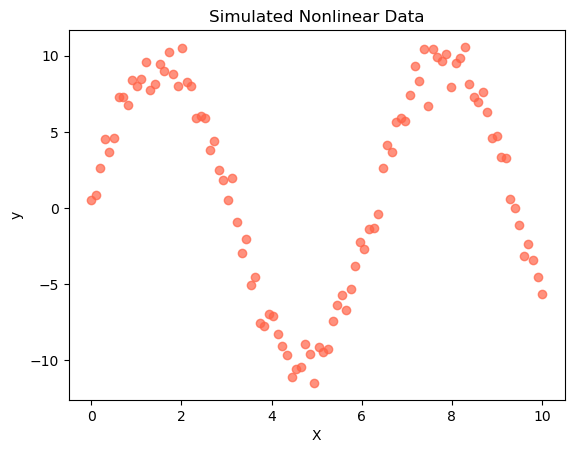

Harvey-Collier test p-value: 0.0439
Reject the null hypothesis. Model is likely misspecified and a nonlinear fit would be better.
Example 2: Linear data


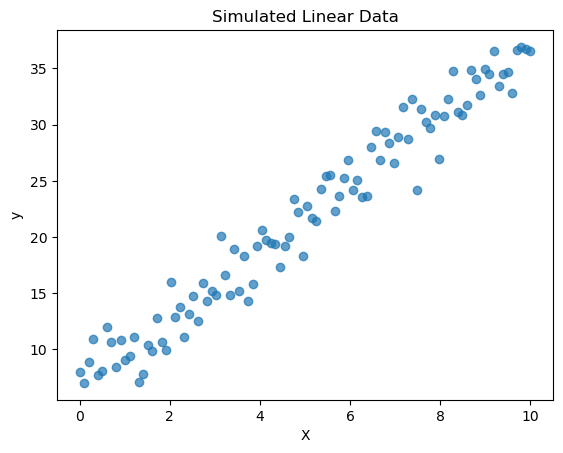

Harvey-Collier test p-value: 0.1164
Fail to reject null hypothesis. Model is likely linear.


In [30]:
def harvey_collier(X, y):
    import numpy as np
    import statsmodels.api as sm
    from statsmodels.stats.diagnostic import linear_harvey_collier
    
    # Ensure NumPy array. Converts data to 2D if it isn't already
    X = np.asarray(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    X = sm.add_constant(X)

    # Fit linear regression model
    model = sm.OLS(y, X).fit()

    # Perform Harvey-Collier test and return p-value
    t_stat, p_value = linear_harvey_collier(model)
    return p_value


import numpy as np
import matplotlib.pyplot as plt
#from BIOM480Tests import harvey_collier

print(f"Example 1: Nonlinear data")
# Simulate nonlinear data
np.random.seed(42)
X_nl = np.linspace(0, 10, 100)
y_nl = np.sin(X_nl) * 10 + np.random.normal(scale=1, size=100)  # clear nonlinear pattern

# Visualize the nonlinear data
plt.scatter(X_nl, y_nl, alpha=0.7, color='tomato')
plt.title("Simulated Nonlinear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Run Harvey-Collier Test
p_value_nl = harvey_collier(X_nl, y_nl)
print(f"Harvey-Collier test p-value: {p_value_nl:.4f}")

# Print results from p-value
if p_value_nl < 0.05:
    print(f"Reject the null hypothesis. Model is likely misspecified and a nonlinear fit would be better.")
else:
    if p_value_nl >= 0.05:
        print(f"Fail to reject null hypothesis. Model is likely linear.")

print(f"Example 2: Linear data")
# Simulate linear data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 3 * X + 7 + np.random.normal(scale=2, size=100)  # linear with some noise

# Visualize the data
plt.scatter(X, y, alpha=0.7)
plt.title("Simulated Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Run Harvey-Collier Test
p_value = harvey_collier(X, y)
print(f"Harvey-Collier test p-value: {p_value:.4f}")

# Print results from p-value
if p_value < 0.05:
    print(f"Reject the null hypothesis. Model is likely misspecified and a nonlinear fit would be better.")
else:
    if p_value >= 0.05:
        print(f"Fail to reject null hypothesis. Model is likely linear.")